In [9]:
import pandas as pd
from functools import reduce

folder_path = 'datasets/preprocessed/'
clients_paths = [
    folder_path + "client_0.parquet",
    folder_path + "client_1.parquet",
    folder_path + "client_2.parquet",
    folder_path + "client_3.parquet",
    folder_path + "client_4.parquet",
    folder_path + "client_5.parquet",
    folder_path + "client_6.parquet",
    folder_path + "client_7.parquet",
    folder_path + "test.parquet"
]

def load_dataset_columns(client_paths):
    client_columns = {}
    for i, client_path in enumerate(client_paths):
        df = pd.read_parquet(client_path)
        client_columns[f'client_{i}'] = set(df.columns)
    return client_columns

def find_common_and_unique_columns(client_columns):
    all_columns = list(client_columns.values())
    common_columns = set.intersection(*all_columns)
    unique_columns = set.union(*all_columns) - common_columns
    return common_columns, unique_columns

client_columns = load_dataset_columns(clients_paths)

common_columns, unique_columns = find_common_and_unique_columns(client_columns)

print("Common Columns:")
for col in common_columns:
    print(col)

print("\nUnique Columns per Client:")
for client, columns in client_columns.items():
    unique_to_client = columns - common_columns
    print(f"\n{client}:")
    for col in unique_to_client:
        print(col)


Common Columns:
src_degree
Fwd Seg Size Min
Tot Fwd Pkts
TotLen Bwd Pkts
dst_eigenvector
Dst IP
Idle Std
Flow IAT Min
Bwd Pkt Len Mean
Pkt Len Max
Idle Max
Fwd IAT Min
Label
Pkt Size Avg
SYN Flag Cnt
Bwd URG Flags
Flow Duration
Idle Min
Fwd PSH Flags
dst_degree
Active Std
Src Port
Pkt Len Std
CWE Flag Count
Fwd IAT Max
src_betweenness
Bwd PSH Flags
Flow ID
Bwd Pkt Len Min
src_pagerank
Fwd Pkt Len Max
Bwd IAT Mean
Fwd Pkt Len Min
Active Min
Fwd Byts/b Avg
Flow IAT Mean
Flow IAT Std
dst_k_core
Flow Pkts/s
Init Fwd Win Byts
Active Max
Flow IAT Max
Down/Up Ratio
Fwd IAT Mean
Class
Subflow Fwd Byts
Bwd IAT Max
Protocol
Attack
dst_betweenness
Fwd Blk Rate Avg
Bwd Header Len
Tot Bwd Pkts
Active Mean
dst_k_truss
Fwd Act Data Pkts
Src IP
Flow Byts/s
dst_closeness
src_k_core
URG Flag Cnt
dst_pagerank
src_eigenvector
Bwd Pkts/s
Pkt Len Mean
src_closeness
Fwd IAT Tot
Bwd Blk Rate Avg
Bwd Pkts/b Avg
ECE Flag Cnt
TotLen Fwd Pkts
Fwd Header Len
Bwd Pkt Len Max
FIN Flag Cnt
Timestamp
Bwd IAT Tot
src_k

In [8]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

folder_path = 'datasets/preprocessed/'
clients_paths = [
    folder_path + "client_0.parquet",
    folder_path + "client_1.parquet",
    folder_path + "client_2.parquet",
    folder_path + "client_3.parquet",
    folder_path + "client_4.parquet",
    folder_path + "client_5.parquet",
    folder_path + "client_6.parquet",
    folder_path + "client_7.parquet"
]
clients_paths = [
    folder_path + "test.parquet"
]

cn_measures_type_2 = [
    "dst_global_betweenness",
    "src_global_degree",
    "dst_global_degree",
    "src_mv",
    "src_global_pagerank",
    "dst_global_pagerank",
    "src_global_betweenness",
    "dst_mv"
]

cn_measures_type_1 = [
    "dst_local_pagerank",
    "src_local_betweenness",
    "src_Comm",
    "src_local_degree",
    "dst_local_betweenness",
    "dst_Comm",
    "dst_local_degree",
    "src_local_pagerank"
]

def apply_pca_to_centrality_measures(df, cn_measures, n_components=2):
    centrality_data = df[cn_measures].fillna(0)  # Fill NaNs with 0 for simplicity
    
    scaler = StandardScaler()
    centrality_data_std = scaler.fit_transform(centrality_data)
    
    pca = PCA(n_components=n_components)
    centrality_data_pca = pca.fit_transform(centrality_data_std)
    
    pca_columns = [f'pca_{i+1}' for i in range(n_components)]
    centrality_data_pca_df = pd.DataFrame(centrality_data_pca, columns=pca_columns, index=df.index)
    
    return centrality_data_pca_df

output_folder = 'datasets_pca'
os.makedirs(output_folder, exist_ok=True)

for i, client_path in enumerate(clients_paths):
    df = pd.read_parquet(client_path)
    
    if i < 5:
        cn_measures = cn_measures_type_2
    else:
        cn_measures = cn_measures_type_1
    
    client_cn_measures = [measure for measure in cn_measures if measure in df.columns]
    
    centrality_data_pca_df = apply_pca_to_centrality_measures(df, client_cn_measures)
    
    df_pca = pd.concat([df.drop(columns=client_cn_measures), centrality_data_pca_df], axis=1)
    
    output_path = os.path.join(output_folder, f'client_{i}_pca.parquet')
    df_pca.to_parquet(output_path)

    print(f'Processed PCA for client {i}, saved to {output_path}')


Processed PCA for client 0, saved to datasets_pca\client_0_pca.parquet


In [7]:
import os
import pandas as pd

output_folder = 'datasets_pca'

pca_clients_paths = [
    os.path.join(output_folder, f'client_{i}_pca.parquet') for i in range(8)
]

def inspect_pca_transformed_datasets(pca_clients_paths):
    for i, pca_client_path in enumerate(pca_clients_paths):
        df_pca = pd.read_parquet(pca_client_path)
        
        print(f'Client {i} PCA-Transformed Data:')
        print(df_pca.head())
        print('\n')

inspect_pca_transformed_datasets(pca_clients_paths)


Client 0 PCA-Transformed Data:
                                        Flow ID          Src IP  Src Port  \
879657    192.168.1.36-192.168.1.195-44940-80-6    192.168.1.36   44940.0   
2736285   192.168.1.32-192.168.1.152-41284-80-6    192.168.1.32   41284.0   
1326399       99.177.192.168-1.169.216.58-0-0-0  99.177.192.168       0.0   
2187263  192.168.1.35-18.194.169.124-55998-80-6    192.168.1.35   55998.0   
742959    192.168.1.35-192.168.1.195-43346-80-6    192.168.1.35   43346.0   

                 Dst IP  Dst Port  Protocol               Timestamp  \
879657    192.168.1.195      80.0       6.0  27/04/2019 03:35:49 pm   
2736285   192.168.1.152      80.0       6.0  27/04/2019 04:37:44 pm   
1326399    1.169.216.58       0.0       0.0  30/04/2019 12:31:38 am   
2187263  18.194.169.124      80.0       6.0  27/04/2019 08:21:56 pm   
742959    192.168.1.195      80.0       6.0  27/04/2019 07:48:22 pm   

         Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  ...  src_closeness  \
87965

Client 4 PCA-Transformed Data:
                                       Flow ID           Src IP  Src Port  \
188743   192.168.1.35-192.168.1.195-52234-80-6     192.168.1.35   52234.0   
1269679     112.209.192.168-1.31.192.168-0-0-0  112.209.192.168       0.0   
2098299  192.168.1.39-192.168.1.190-38270-80-6     192.168.1.39   38270.0   
1083487  192.168.1.35-192.168.1.195-52952-80-6     192.168.1.35   52952.0   
1803316  192.168.1.195-192.168.1.35-80-59902-6    192.168.1.195      80.0   

                Dst IP  Dst Port  Protocol               Timestamp  \
188743   192.168.1.195      80.0       6.0  27/04/2019 08:18:06 pm   
1269679   1.31.192.168       0.0       0.0  24/04/2019 02:15:54 am   
2098299  192.168.1.190      80.0       6.0  27/04/2019 07:30:10 pm   
1083487  192.168.1.195      80.0       6.0  27/04/2019 05:39:51 pm   
1803316   192.168.1.35   59902.0       6.0  27/04/2019 04:53:06 pm   

         Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  ...  src_closeness  \
188743     

Processed PCA for client 0, saved to datasets_pca\client_0_pca.parquet
Processed PCA for client 1, saved to datasets_pca\client_1_pca.parquet
Processed PCA for client 2, saved to datasets_pca\client_2_pca.parquet
Processed PCA for client 3, saved to datasets_pca\client_3_pca.parquet
Processed PCA for client 4, saved to datasets_pca\client_4_pca.parquet
Processed PCA for client 5, saved to datasets_pca\client_5_pca.parquet
Processed PCA for client 6, saved to datasets_pca\client_6_pca.parquet
Processed PCA for client 7, saved to datasets_pca\client_7_pca.parquet


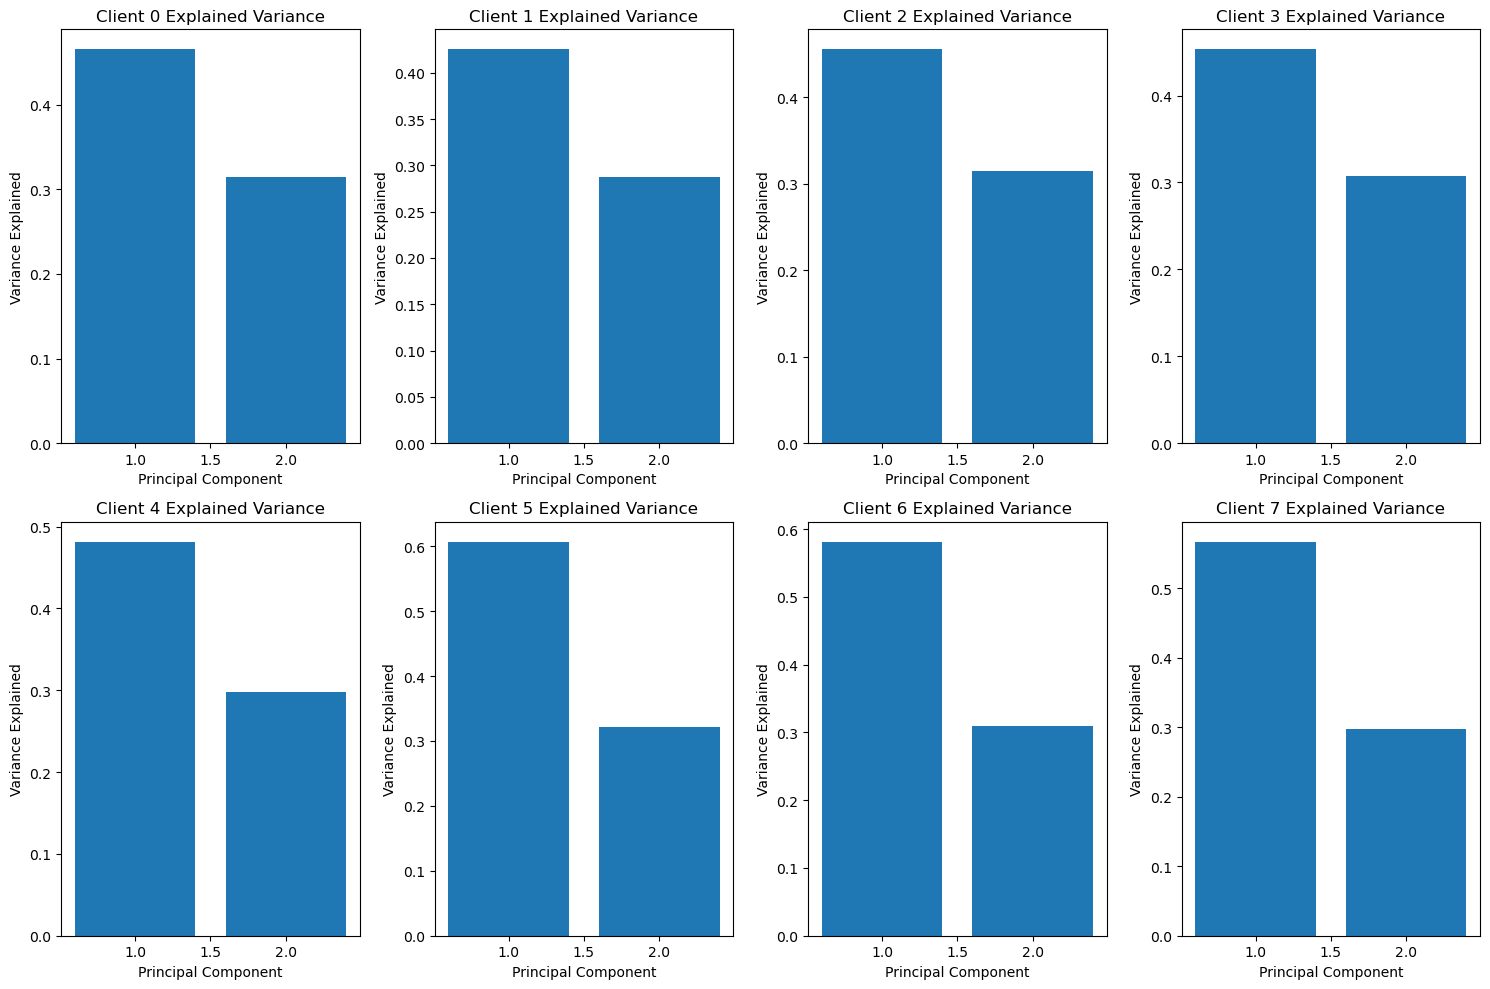

In [2]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

folder_path = 'datasets/preprocessed/'
clients_paths = [
    folder_path + "client_0.parquet",
    folder_path + "client_1.parquet",
    folder_path + "client_2.parquet",
    folder_path + "client_3.parquet",
    folder_path + "client_4.parquet",
    folder_path + "client_5.parquet",
    folder_path + "client_6.parquet",
    folder_path + "client_7.parquet"
]

cn_measures_type_2 = [
    "dst_global_betweenness",
    "src_global_degree",
    "dst_global_degree",
    "src_mv",
    "src_global_pagerank",
    "dst_global_pagerank",
    "src_global_betweenness",
    "dst_mv"
]

cn_measures_type_1 = [
    "dst_local_pagerank",
    "src_local_betweenness",
    "src_Comm",
    "src_local_degree",
    "dst_local_betweenness",
    "dst_Comm",
    "dst_local_degree",
    "src_local_pagerank"
]

def apply_pca_to_centrality_measures(df, cn_measures, n_components=2):
    centrality_data = df[cn_measures].fillna(0)  
    
    scaler = StandardScaler()
    centrality_data_std = scaler.fit_transform(centrality_data)
    
    pca = PCA(n_components=n_components)
    centrality_data_pca = pca.fit_transform(centrality_data_std)
    
    pca_columns = [f'pca_{i+1}' for i in range(n_components)]
    centrality_data_pca_df = pd.DataFrame(centrality_data_pca, columns=pca_columns, index=df.index)
    
    explained_variance = pca.explained_variance_ratio_
    
    return centrality_data_pca_df, explained_variance

output_folder = 'datasets_pca'
os.makedirs(output_folder, exist_ok=True)

explained_variances = []

for i, client_path in enumerate(clients_paths):
    df = pd.read_parquet(client_path)
    
    if i < 5:
        cn_measures = cn_measures_type_2
    else:
        cn_measures = cn_measures_type_1
    
    client_cn_measures = [measure for measure in cn_measures if measure in df.columns]
    
    centrality_data_pca_df, explained_variance = apply_pca_to_centrality_measures(df, client_cn_measures)
    explained_variances.append(explained_variance)
    
    df_pca = pd.concat([df.drop(columns=client_cn_measures), centrality_data_pca_df], axis=1)
    
    output_path = os.path.join(output_folder, f'client_{i}_pca.parquet')
    df_pca.to_parquet(output_path)

    print(f'Processed PCA for client {i}, saved to {output_path}')

plt.figure(figsize=(15, 10))

num_clients = len(clients_paths)
for i in range(num_clients):
    plt.subplot(2, (num_clients + 1) // 2, i + 1)
    plt.bar(range(1, len(explained_variances[i]) + 1), explained_variances[i])
    plt.title(f'Client {i} Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

plt.tight_layout()
plt.show()


Processed PCA for client 0, saved to datasets_pca_federated\client_0_pca.parquet
Processed PCA for client 1, saved to datasets_pca_federated\client_1_pca.parquet
Processed PCA for client 2, saved to datasets_pca_federated\client_2_pca.parquet
Processed PCA for client 3, saved to datasets_pca_federated\client_3_pca.parquet
Processed PCA for client 4, saved to datasets_pca_federated\client_4_pca.parquet
Processed PCA for client 5, saved to datasets_pca_federated\client_5_pca.parquet
Processed PCA for client 6, saved to datasets_pca_federated\client_6_pca.parquet
Processed PCA for client 7, saved to datasets_pca_federated\client_7_pca.parquet


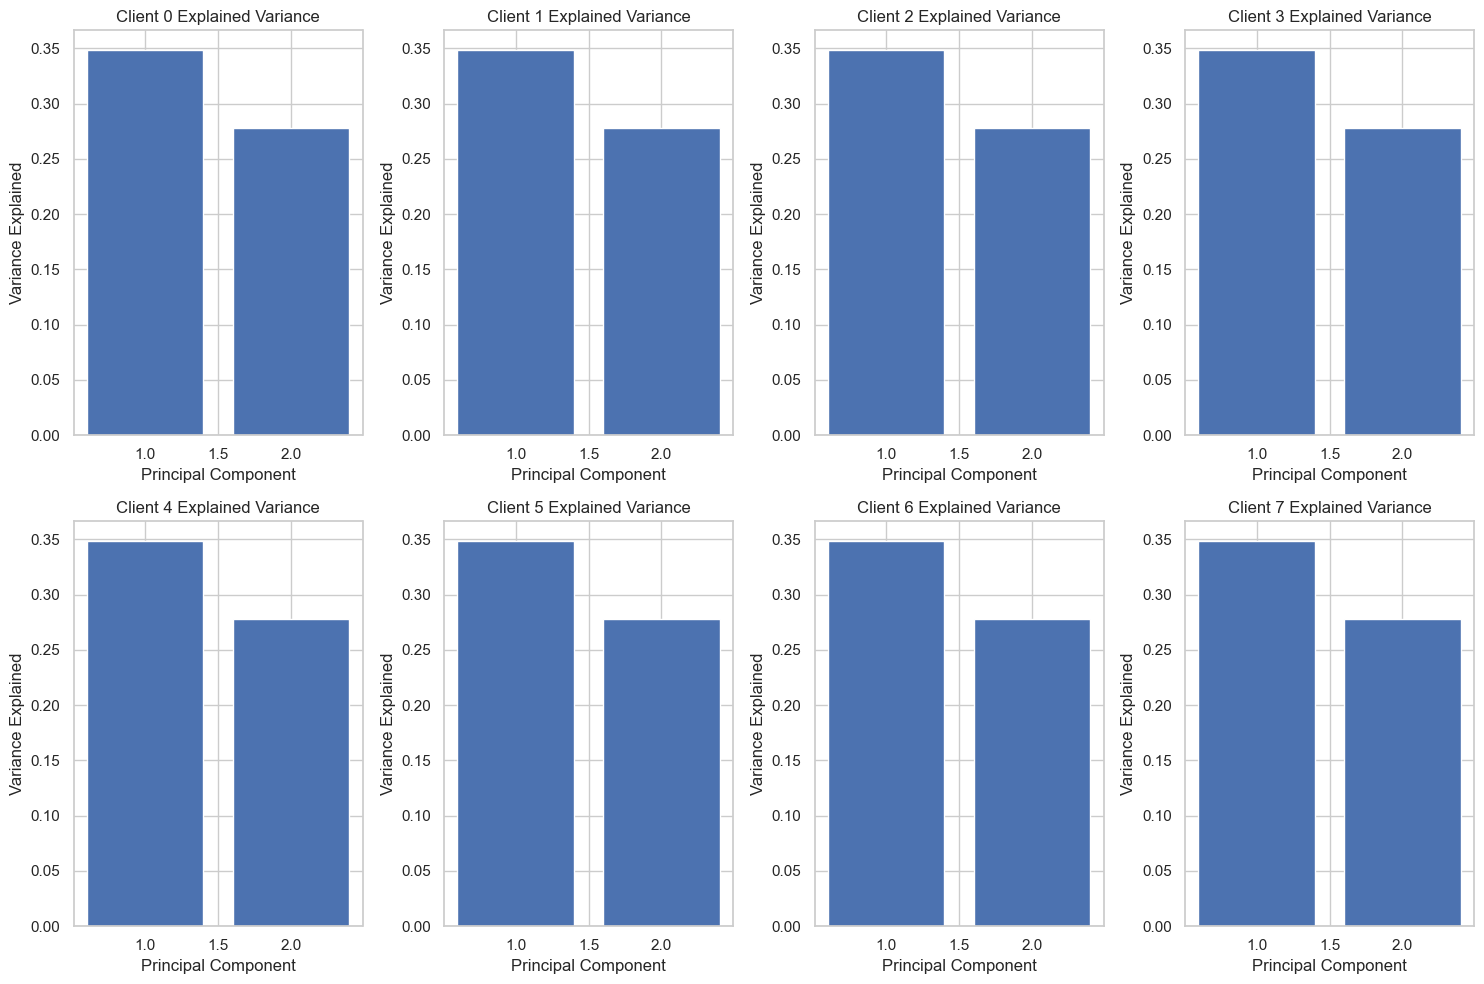

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

folder_path = 'datasets/preprocessed/'
clients_paths = [
    folder_path + "client_0.parquet",
    folder_path + "client_1.parquet",
    folder_path + "client_2.parquet",
    folder_path + "client_3.parquet",
    folder_path + "client_4.parquet",
    folder_path + "client_5.parquet",
    folder_path + "client_6.parquet",
    folder_path + "client_7.parquet"
]

cn_measures_type_2 = [
    "dst_global_betweenness",
    "src_global_degree",
    "dst_global_degree",
    "src_mv",
    "src_global_pagerank",
    "dst_global_pagerank",
    "src_global_betweenness",
    "dst_mv"
]

cn_measures_type_1 = [
    "dst_local_pagerank",
    "src_local_betweenness",
    "src_Comm",
    "src_local_degree",
    "dst_local_betweenness",
    "dst_Comm",
    "dst_local_degree",
    "src_local_pagerank"
]

def calculate_local_covariance(df, cn_measures):
    centrality_data = df[cn_measures].fillna(0)  # Fill NaNs with 0 for simplicity
    scaler = StandardScaler()
    centrality_data_std = scaler.fit_transform(centrality_data)
    covariance_matrix = np.cov(centrality_data_std, rowvar=False)
    return covariance_matrix, scaler.mean_, scaler.scale_

# Step 2: Compute local covariance matrices
local_covariances = []
local_means = []
local_scales = []

for i, client_path in enumerate(clients_paths):
    df = pd.read_parquet(client_path)
    cn_measures = cn_measures_type_2 if i < 5 else cn_measures_type_1
    client_cn_measures = [measure for measure in cn_measures if measure in df.columns]
    covariance_matrix, mean, scale = calculate_local_covariance(df, client_cn_measures)
    local_covariances.append(covariance_matrix)
    local_means.append(mean)
    local_scales.append(scale)

# Step 3: Aggregate covariance matrices
global_covariance_matrix = np.mean(local_covariances, axis=0)

# Step 4: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eigh(global_covariance_matrix)

# Step 5: Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Select the top n components
n_components = 2
principal_components = eigen_vectors[:, :n_components]

# Step 6: Transform local data using the global principal components
def apply_global_pca(df, cn_measures, mean, scale, principal_components):
    centrality_data = df[cn_measures].fillna(0)
    centrality_data_std = (centrality_data - mean) / scale
    centrality_data_pca = np.dot(centrality_data_std, principal_components)
    pca_columns = [f'pca_{i+1}' for i in range(principal_components.shape[1])]
    centrality_data_pca_df = pd.DataFrame(centrality_data_pca, columns=pca_columns, index=df.index)
    return centrality_data_pca_df

output_folder = 'datasets_pca_federated'
os.makedirs(output_folder, exist_ok=True)

explained_variances = eigen_values[:n_components] / np.sum(eigen_values)

for i, client_path in enumerate(clients_paths):
    df = pd.read_parquet(client_path)
    cn_measures = cn_measures_type_2 if i < 5 else cn_measures_type_1
    client_cn_measures = [measure for measure in cn_measures if measure in df.columns]
    centrality_data_pca_df = apply_global_pca(df, client_cn_measures, local_means[i], local_scales[i], principal_components)
    df_pca = pd.concat([df.drop(columns=client_cn_measures), centrality_data_pca_df], axis=1)
    output_path = os.path.join(output_folder, f'client_{i}_pca.parquet')
    df_pca.to_parquet(output_path)
    print(f'Processed PCA for client {i}, saved to {output_path}')

# Plot the histograms for all clients
plt.figure(figsize=(15, 10))
num_clients = len(clients_paths)
for i in range(num_clients):
    plt.subplot(2, (num_clients + 1) // 2, i + 1)
    plt.bar(range(1, len(explained_variances) + 1), explained_variances)
    plt.title(f'Client {i} Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

plt.tight_layout()
plt.show()


In [6]:
clients_pca_paths = [os.path.join(output_folder, f'client_{i}_pca.parquet') for i in range(len(clients_paths))]
pca_dfs = [pd.read_parquet(client_pca_path) for client_pca_path in clients_pca_paths]

# Display first few rows of each PCA dataset
for i, pca_df in enumerate(pca_dfs):
    print(f'Client {i} PCA Data:')
    print(pca_df.head())
    print('\n')



Client 0 PCA Data:
                                        Flow ID          Src IP  Src Port  \
879657    192.168.1.36-192.168.1.195-44940-80-6    192.168.1.36   44940.0   
2736285   192.168.1.32-192.168.1.152-41284-80-6    192.168.1.32   41284.0   
1326399       99.177.192.168-1.169.216.58-0-0-0  99.177.192.168       0.0   
2187263  192.168.1.35-18.194.169.124-55998-80-6    192.168.1.35   55998.0   
742959    192.168.1.35-192.168.1.195-43346-80-6    192.168.1.35   43346.0   

                 Dst IP  Dst Port  Protocol               Timestamp  \
879657    192.168.1.195      80.0       6.0  27/04/2019 03:35:49 pm   
2736285   192.168.1.152      80.0       6.0  27/04/2019 04:37:44 pm   
1326399    1.169.216.58       0.0       0.0  30/04/2019 12:31:38 am   
2187263  18.194.169.124      80.0       6.0  27/04/2019 08:21:56 pm   
742959    192.168.1.195      80.0       6.0  27/04/2019 07:48:22 pm   

         Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  ...  src_closeness  \
879657           

Processed PCA for client 0, saved to datasets_pca_federated_new\client_0_pca.parquet
Processed PCA for client 1, saved to datasets_pca_federated_new\client_1_pca.parquet
Processed PCA for client 2, saved to datasets_pca_federated_new\client_2_pca.parquet
Processed PCA for client 3, saved to datasets_pca_federated_new\client_3_pca.parquet
Processed PCA for client 4, saved to datasets_pca_federated_new\client_4_pca.parquet
Processed PCA for client 5, saved to datasets_pca_federated_new\client_5_pca.parquet
Processed PCA for client 6, saved to datasets_pca_federated_new\client_6_pca.parquet
Processed PCA for client 7, saved to datasets_pca_federated_new\client_7_pca.parquet
Processed PCA for client 8, saved to datasets_pca_federated_new\client_8_pca.parquet


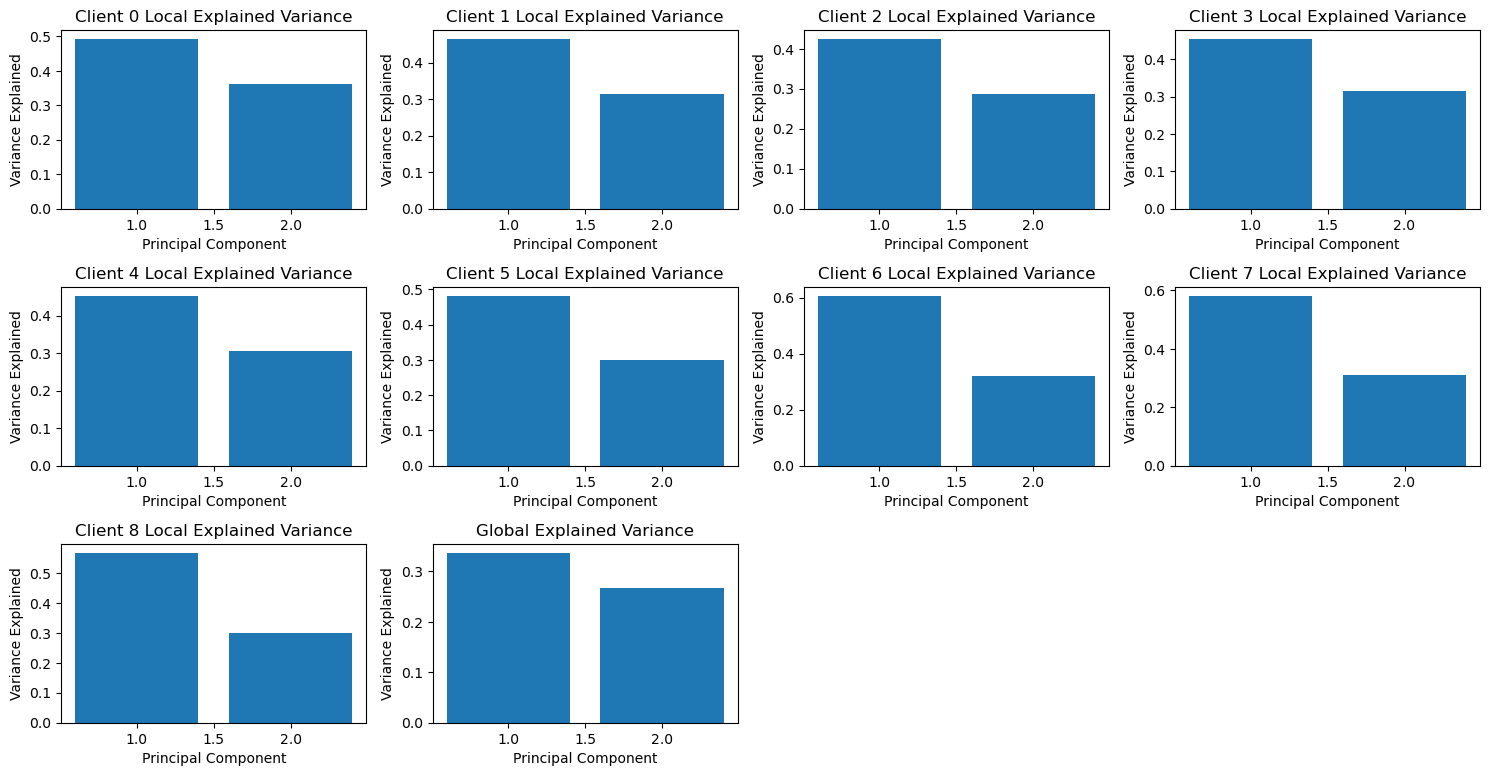

In [13]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define paths and centrality measures
folder_path = 'datasets/preprocessed/'
clients_paths = [
    folder_path + "test.parquet",
    folder_path + "client_0.parquet",
    folder_path + "client_1.parquet",
    folder_path + "client_2.parquet",
    folder_path + "client_3.parquet",
    folder_path + "client_4.parquet",
    folder_path + "client_5.parquet",
    folder_path + "client_6.parquet",
    folder_path + "client_7.parquet"

]

cn_measures_type_2 = [
    "dst_global_betweenness",
    "src_global_degree",
    "dst_global_degree",
    "src_mv",
    "src_global_pagerank",
    "dst_global_pagerank",
    "src_global_betweenness",
    "dst_mv"
]

cn_measures_type_1 = [
    "dst_local_pagerank",
    "src_local_betweenness",
    "src_Comm",
    "src_local_degree",
    "dst_local_betweenness",
    "dst_Comm",
    "dst_local_degree",
    "src_local_pagerank"
]

def calculate_local_covariance(df, cn_measures):
    centrality_data = df[cn_measures].fillna(0)  
    scaler = StandardScaler()
    centrality_data_std = scaler.fit_transform(centrality_data)
    covariance_matrix = np.cov(centrality_data_std, rowvar=False)
    return covariance_matrix, scaler.mean_, scaler.scale_

def apply_local_pca(df, cn_measures, n_components=2):
    centrality_data = df[cn_measures].fillna(0)
    scaler = StandardScaler()
    centrality_data_std = scaler.fit_transform(centrality_data)
    pca = PCA(n_components=n_components)
    centrality_data_pca = pca.fit_transform(centrality_data_std)
    explained_variance = pca.explained_variance_ratio_
    return explained_variance

local_covariances = []
local_means = []
local_scales = []
local_explained_variances = []

for i, client_path in enumerate(clients_paths):
    df = pd.read_parquet(client_path)
    cn_measures = cn_measures_type_2 if i < 6 else cn_measures_type_1
    client_cn_measures = [measure for measure in cn_measures if measure in df.columns]
    if len(client_cn_measures) == 0:
        print(f"No centrality measures found in client {i} data.")
    covariance_matrix, mean, scale = calculate_local_covariance(df, client_cn_measures)
    local_covariances.append(covariance_matrix)
    local_means.append(mean)
    local_scales.append(scale)
    explained_variance = apply_local_pca(df, client_cn_measures)
    local_explained_variances.append(explained_variance)

global_covariance_matrix = np.mean(local_covariances, axis=0)

eigen_values, eigen_vectors = np.linalg.eigh(global_covariance_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

n_components = 2
principal_components = eigen_vectors[:, :n_components]

def apply_global_pca(df, cn_measures, mean, scale, principal_components):
    centrality_data = df[cn_measures].fillna(0)
    centrality_data_std = (centrality_data - mean) / scale
    centrality_data_pca = np.dot(centrality_data_std, principal_components)
    pca_columns = [f'pca_{i+1}' for i in range(principal_components.shape[1])]
    centrality_data_pca_df = pd.DataFrame(centrality_data_pca, columns=pca_columns, index=df.index)
    return centrality_data_pca_df

output_folder = 'datasets_pca_federated_new'
os.makedirs(output_folder, exist_ok=True)

explained_variances = eigen_values[:n_components] / np.sum(eigen_values)

for i, client_path in enumerate(clients_paths):
    df = pd.read_parquet(client_path)
    cn_measures = cn_measures_type_2 if i < 6 else cn_measures_type_1
    client_cn_measures = [measure for measure in cn_measures if measure in df.columns]
    if len(client_cn_measures) == 0:
        print(f"No centrality measures found in client {i} data.")
    centrality_data_pca_df = apply_global_pca(df, client_cn_measures, local_means[i], local_scales[i], principal_components)
    df_pca = pd.concat([df.drop(columns=client_cn_measures), centrality_data_pca_df], axis=1)
    output_path = os.path.join(output_folder, f'client_{i}_pca.parquet')
    df_pca.to_parquet(output_path)
    print(f'Processed PCA for client {i}, saved to {output_path}')

plt.figure(figsize=(15, 10))

for i, explained_variance in enumerate(local_explained_variances):
    plt.subplot(4, 4, i + 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.title(f'Client {i} Local Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

plt.subplot(4, 4, len(local_explained_variances) + 1)
plt.bar(range(1, len(explained_variances) + 1), explained_variances)
plt.title('Global Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.tight_layout()
plt.show()
